In [6]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import os

import torch.nn as nn
import torch
from torch.utils.data import Dataset, DataLoader
from torchtext.data.utils import get_tokenizer

from torchtext.vocab import Vocab
from collections import Counter

from kagglehub import KaggleDatasetAdapter

warnings.filterwarnings("ignore")

# # !pip3 install torch==2.3.0 torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
# # # !pip uninstall torch torchvision torchaudio -y


In [7]:
path = kagglehub.dataset_download("venky73/spam-mails-dataset")

print(torch.__version__)

2.3.0


In [8]:
print("Path to dataset files:", path)

Path to dataset files: /Users/aman/.cache/kagglehub/datasets/venky73/spam-mails-dataset/versions/1


In [40]:

is_cuda = torch.cuda.is_available()

if is_cuda:
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")

device = torch.device("mps")
    
    


GPU is available


In [17]:
csv = os.path.join(path, "spam_ham_dataset.csv")
print(csv)

/Users/aman/.cache/kagglehub/datasets/venky73/spam-mails-dataset/versions/1/spam_ham_dataset.csv


In [18]:
# if os.path.exists(csv):
#     print("File Exists")
# else:
#     print("File doesn't exist")


In [19]:
data = pd.read_csv(csv)
data.sample(n = 100)

,Unnamed: 0,label,text,label_num
4944,1396,ham,"Subject: meter # 1552\r\nrobert ,\r\nthere is ...",0
4690,3009,ham,Subject: fw : payment\r\njo hillier - smith\r\...,0
2364,2025,ham,Subject: enron / hpl actuals for november 10 -...,0
1978,66,ham,"Subject: meter 74 , december bridgeback error\...",0
2495,621,ham,Subject: hr performance objectives binders\r\n...,0
...,...,...,...,...
1748,3743,spam,Subject: holiday e - cards\r\n,1
2637,3431,ham,Subject: thank you for your contribution ! tog...,0
326,2305,ham,"Subject: enron actuals for dec . 27 , 2000\r\n...",0
4963,1271,ham,Subject: fw : more megan pics\r\n?\r\n- - - - ...,0


In [20]:
data.info()


print("------------------------")

only_text = data[["text","label_num"]]

only_text.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB
------------------------


,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [21]:
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [22]:
text_length = len(only_text) 


In [23]:
from sklearn.model_selection import train_test_split
import re

import torch

def pre_processing(text):
    # Convert to lowercase
    text = text.lower()
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    text = text.replace('subject', '')
    
    tokenizer = get_tokenizer("basic_english")
    
    tokens = tokenizer(text)
    
    
    vocab = {token: index for index, token in enumerate(sorted(set(tokens)))}
    
    encoded_text = [vocab[token] for token in tokens]
    
    text_tensor = torch.tensor(encoded_text)

    
    # # Numerical encoding
    # encoded_text = [vocab[token] for token in tokens]
      
    return text_tensor
  

def build_vocab(text):
  counter.update(text)

counter = Counter()

print(pre_processing("Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes ."))

data["processed"] = data["text"].apply(pre_processing)

data["processed"].apply(build_vocab)

min_freq = 3
filtered_counter = Counter({word: count for word, count in counter.items() if count >= min_freq})
vocab = counter


print(len(filtered_counter))

data.head()

tensor([11, 21, 20, 37, 19,  0, 13, 39, 38, 36, 24, 18, 17, 41, 26, 22, 30, 12,
         9, 32,  3,  8, 28, 27, 29, 35,  7, 40, 31, 42, 38, 34,  7,  1, 41,  4,
        25, 15, 16,  6, 37,  5, 19, 23,  2, 14, 10, 33])
0


,Unnamed: 0,label,text,label_num,processed
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,"[tensor(11), tensor(21), tensor(20), tensor(37..."
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,"[tensor(3), tensor(6), tensor(2), tensor(5), t..."
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,"[tensor(119), tensor(151), tensor(82), tensor(..."
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,"[tensor(28), tensor(42), tensor(25), tensor(9)..."
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,"[tensor(29), tensor(17), tensor(33), tensor(39..."


In [24]:
set_train_Parameters = data.iloc[:int(0.8 * len(data))]

set_test_Parameters = data.iloc[int((0.8) * len(data)):]

training_data = set_train_Parameters[["processed", "label_num"]]

test_data = set_test_Parameters[["processed", "label_num"]]

training_data_no_proccess = set_train_Parameters[["text", "label_num"]]

test_data_no_proccess = set_test_Parameters[["text", "label_num"]]


print(len(training_data_no_proccess))
print(len(test_data_no_proccess))
training_data.head()


4136
1035


,processed,label_num
0,"[tensor(11), tensor(21), tensor(20), tensor(37...",0
1,"[tensor(3), tensor(6), tensor(2), tensor(5), t...",0
2,"[tensor(119), tensor(151), tensor(82), tensor(...",0
3,"[tensor(28), tensor(42), tensor(25), tensor(9)...",1
4,"[tensor(29), tensor(17), tensor(33), tensor(39...",0


Text(0, 0.5, 'Count')

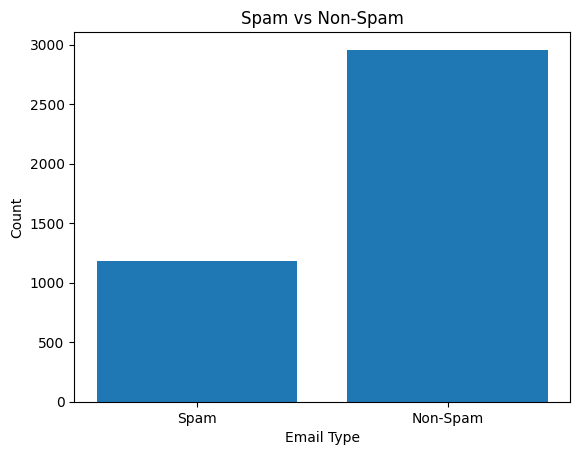

In [25]:
spam_count = training_data_no_proccess["label_num"].value_counts()[1]
non_spam_count = training_data_no_proccess["label_num"].value_counts()[0]

plt.bar(["Spam", "Non-Spam"], [spam_count, non_spam_count])
plt.title("Spam vs Non-Spam")
plt.xlabel("Email Type")
plt.ylabel("Count")

In [26]:
class SpamDataset(Dataset):
    def __init__(self, df, text_col, label_col):
        self.processed_texts = df[text_col].tolist()  
        self.labels = df[label_col].tolist()
       
    def __len__(self):
        return len(self.processed_texts)

    def __getitem__(self,idx):
        # Convert tokens to indices
        tokens = self.processed_texts[idx]
        label = self.labels[idx]
        return torch.tensor(tokens, dtype=torch.long), torch.tensor(label, dtype=torch.long)
        


train_datasets = SpamDataset(training_data, "processed", "label_num")
test_datasets = SpamDataset(test_data, "processed", "label_num")

print(train_datasets.__getitem__(0))



(tensor([11, 21, 20, 37, 19,  0, 13, 39, 38, 36, 24, 18, 17, 41, 26, 22, 30, 12,
         9, 32,  3,  8, 28, 27, 29, 35,  7, 40, 31, 42, 38, 34,  7,  1, 41,  4,
        25, 15, 16,  6, 37,  5, 19, 23,  2, 14, 10, 33]), tensor(0))


In [27]:
class TextClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_classes):
        super(TextClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, num_classes)
        
    def forward(self, x):
        embedded = self.embedding(x)
        output, _ = self.rnn(embedded)
        last_hidden = output[:, -1, :]
        logits = self.fc(last_hidden)
        return logits

def collate_fn(batch):
    texts, labels = zip(*batch)
    # Pad sequences to the same length
    texts_padded = torch.nn.utils.rnn.pad_sequence(texts, batch_first=True, padding_value=0)
    labels = torch.stack(labels)
    return texts_padded, labels 

In [28]:
learning_rate = 0.001
num_epochs = 3
batch_size = 32
num_classes = 2
VOCAB_SIZE = len(vocab)
print(VOCAB_SIZE)
EMBED_DIM = 128
HIDDEN_DIM = 64

model = TextClassifier(VOCAB_SIZE, EMBED_DIM, HIDDEN_DIM, num_classes)
model.to(device)
print(model)
print(next(model.parameters()).is_cuda)


train_dataloader = DataLoader(train_datasets, batch_size=32, shuffle=True, collate_fn=collate_fn)
test_dataloader = DataLoader(test_datasets, batch_size=32, shuffle=False, collate_fn=collate_fn)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


model.train()
for epoch in range(num_epochs):
    running_loss = 0.0
    for text_batch, label_batch in train_dataloader:
        optimizer.zero_grad()
        text_batch = text_batch.to(device)
        label_batch = label_batch.to(device)        
        outputs = model(text_batch)
        loss = criterion(outputs, label_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Epoch {epoch+1}, Loss: {loss.item():.4f}')


    # for inputs in test_dataloader:
    #     optimizer.zero_grad()
    #     inputs = torch.LongTensor(inputs)
    #     targets = inputs.clone()
    #     outputs = model(inputs)
    #     loss = criterion(outputs.view(-1, num_classes), targets.view(-1))
    #     loss.backward()
    #     optimizer.step()

    #     total_loss += loss.item() * len(inputs)
    #     total_samples += len(inputs)

    # # Evaluate on the validation set after every epoch
    # model.eval()
    # total_val_loss = 0.0
    # total_val_samples = 0
    # with torch.no_grad():
    #     for inputs in test_dataloader:
    #         inputs = torch.LongTensor(inputs)
    #         targets = inputs.clone()
    #         outputs = model(inputs)
    #         val_loss = criterion(outputs.view(-1, num_classes), targets.view(-1))

    #         total_val_loss += val_loss.item() * len(inputs)
    #         total_val_samples += len(inputs)

    # avg_loss = total_loss / total_samples
    # avg_val_loss = total_val_loss / total_val_samples

    # print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

761072
TextClassifier(
  (embedding): Embedding(761072, 128)
  (rnn): LSTM(128, 64, batch_first=True)
  (fc): Linear(in_features=64, out_features=2, bias=True)
)
False


KeyboardInterrupt: 

In [ ]:
model.eval()
print(next(model.parameters()).is_cuda)

def test(model, test_dataloader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            correct += (predicted == labels).sum().item()
    test_loss /= len(test_data)
    accuracy = 100 * correct / len(test_dataloader.dataset)
    return test_loss, accuracy

test_loss, accuracy = test(model, test_dataloader)

print(f'Test Loss: {test_loss:.4f}')
print(f'Accuracy: {accuracy:.2f}%')

True
Test Loss: 0.0198
Accuracy: 69.47%


In [26]:

# Download latest version
path = kagglehub.dataset_download("jackksoncsie/spam-email-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\amann\.cache\kagglehub\datasets\jackksoncsie\spam-email-dataset\versions\1


In [27]:
csv = os.path.join(path, "emails.csv")
print(csv)

C:\Users\amann\.cache\kagglehub\datasets\jackksoncsie\spam-email-dataset\versions\1\emails.csv


In [28]:
if os.path.exists(csv):
    print("File Exists")
else:
    print("File doesn't exist")

File Exists


In [ ]:
new_data = pd.read_csv(csv)
new_df = pd.DataFrame(new_data)

In [ ]:

new_data["processed"] = new_data["text"].apply(pre_processing)

# new_data.info()

procceed_new_data = new_data[["processed", "spam"]]


test_new_datasets = SpamDataset(procceed_new_data, "processed", "spam")
new_test_dataLoader = DataLoader(test_new_datasets, batch_size=32, shuffle=False, collate_fn=collate_fn)

test_loss, accuracy = test(model, new_test_dataLoader)

print(f'Test Loss: {test_loss:.4f}')
print(f'Accuracy: {accuracy:.2f}%')



Test Loss: 0.0970
Accuracy: 75.63%


In [52]:
test_datasets.info()

AttributeError: 'SpamDataset' object has no attribute 'info'